# Ewaluacja cała

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from gensim.utils import tokenize

F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
songs_representation =  '../CSV/piosenki_bigram_count_pl_lem.csv'
readings_representation = '../CSV/czytania_bigram_count_pl_lem.csv'

In [3]:
piosenki = pd.read_csv(songs_representation, header=0, index_col=0)
piosenki.head()

,abba ojciec,abraham izaak,abraham pomny,abraham potomstwo,abraham wykrzykiwać,adonai nadejść,adonai odkąd,adonai wszystek,alleluja alleluja,alleluja amen,...,żyć spragniony,żyć sławić,żyć umrzeć,żyć wiek,żyć wywyższyć,żyć zapomnieć,żyć zstępować,żyć śpiewać,żyć świat,żyła prosto
abba ojcze,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
alleluja niech zabrzmi panu,0,0,0,0,0,0,0,0,15,0,...,0,0,0,0,0,0,0,0,0,0
alleluja alleluja amen amen alleluja,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
blisko blisko blisko jesteś,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bo góry mogą ustąpić,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df = pd.read_excel('../Ewaluacja.xlsx', header=0, names=['dayID', 'date', 'title'])
df.head()

,dayID,date,title
0,1,2018-12-20,Roraty
1,1,2018-12-20,Archanioł Boży Gabriel
2,1,2018-12-20,Oto Pan Bóg przyjdzie
3,1,2018-12-20,Chleb niebiański
4,1,2018-12-20,Dzielmy się wiarą jak chlebem


In [6]:
df['title_tokenized'] = df['title'].apply(lambda x: list(tokenize(x, to_lower=True)))
df['title_cleaned'] = df['title_tokenized'].apply(lambda x: " ".join([z.lower() for z in x if z.isalpha()]))
df.head()

,dayID,date,title,title_tokenized,title_cleaned
0,1,2018-12-20,Roraty,[roraty],roraty
1,1,2018-12-20,Archanioł Boży Gabriel,"[archanioł, boży, gabriel]",archanioł boży gabriel
2,1,2018-12-20,Oto Pan Bóg przyjdzie,"[oto, pan, bóg, przyjdzie]",oto pan bóg przyjdzie
3,1,2018-12-20,Chleb niebiański,"[chleb, niebiański]",chleb niebiański
4,1,2018-12-20,Dzielmy się wiarą jak chlebem,"[dzielmy, się, wiarą, jak, chlebem]",dzielmy się wiarą jak chlebem


In [7]:
piosenki.index

Index(['abba ojcze', 'alleluja niech zabrzmi panu',
       'alleluja alleluja amen amen alleluja', 'blisko blisko blisko jesteś',
       'bo góry mogą ustąpić', 'bo jak śmierć potężna jest miłość',
       'boże twa łaska', 'była cicha i piękna jak wiosna', 'bóg nasz pan',
       'bóg tak umiłował świat',
       ...
       'wzywam cię duchu przyjdź', 'zaprowadź mnie tam',
       'zaufaj panu już dziś', 'zbawca', 'ziemia którą mi dajesz',
       'zmartwychwstał pan', 'łaskawość twoja panie',
       'łaską jesteśmy zbawieni', 'święte imię jezus',
       'święty święty otwieram serce swe'],
      dtype='object', length=185)

In [8]:
215/494

0.4352226720647773

In [9]:
c=0
for i in df.title_cleaned:
    if i in piosenki.index:
        c+=1
print(c)
        

215


In [10]:
87/279

0.3118279569892473

In [11]:
czytania = pd.read_csv(readings_representation, header=0, index_col=0)
czytania.head()

,abba ojciec,abraham izaak,abraham pomny,abraham potomstwo,abraham wykrzykiwać,adonai nadejść,adonai odkąd,adonai wszystek,alleluja alleluja,alleluja amen,...,żyć spragniony,żyć sławić,żyć umrzeć,żyć wiek,żyć wywyższyć,żyć zapomnieć,żyć zstępować,żyć śpiewać,żyć świat,żyła prosto
2018-12-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-12-03,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-12-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-12-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-12-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Obliczanie podobieństwa

In [12]:
print(piosenki.shape)
print(czytania.shape)

(185, 4302)
(87, 4302)


In [14]:
sim = cosine_similarity(piosenki, czytania)

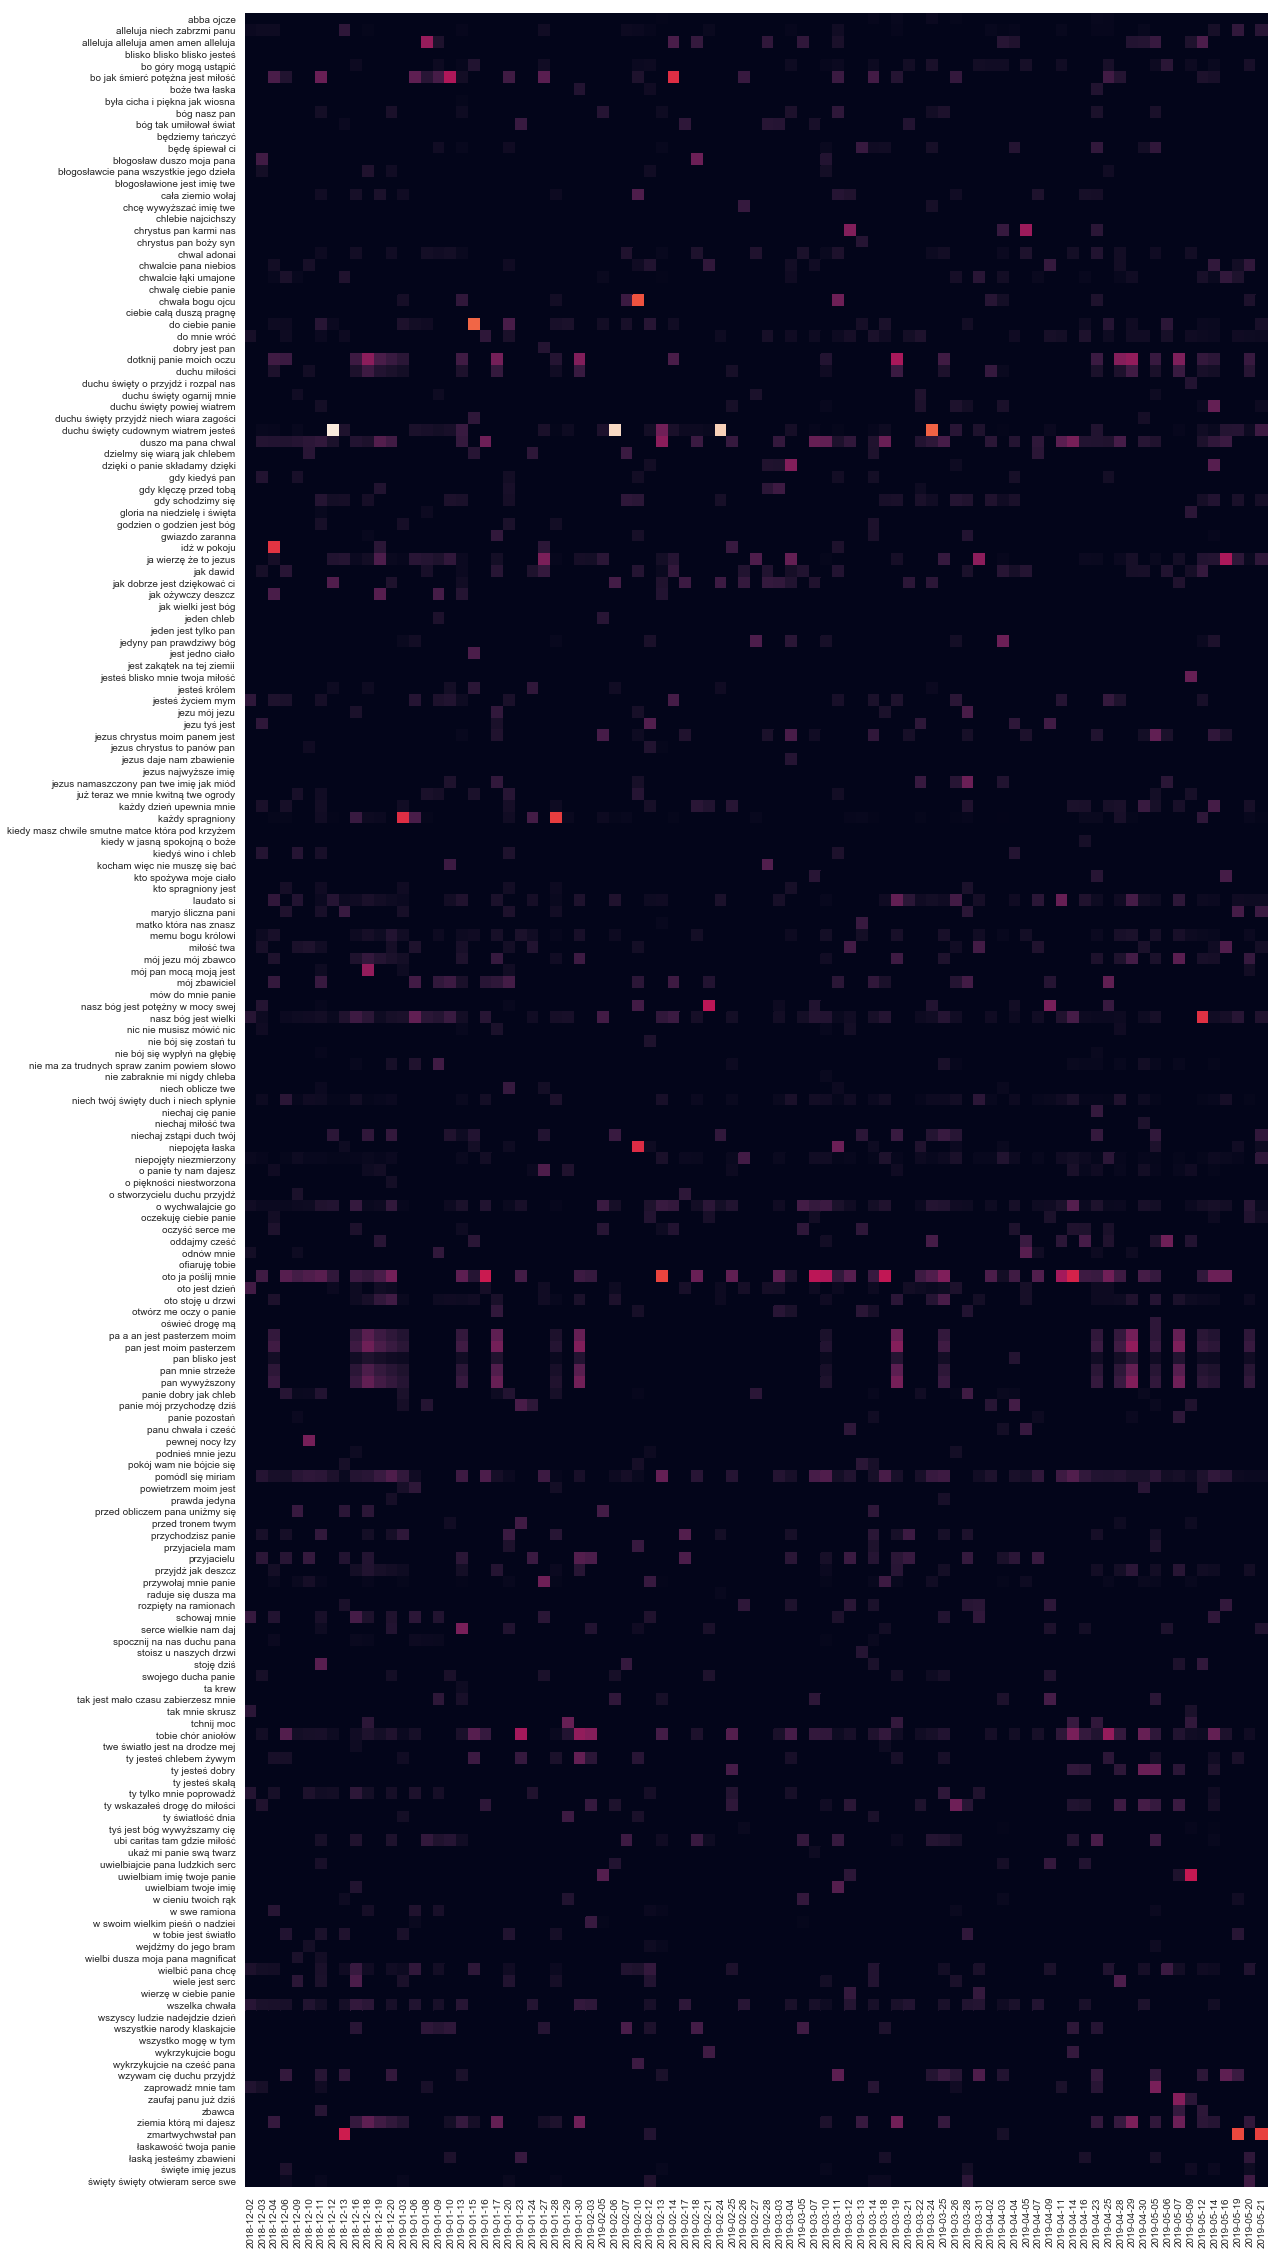

In [15]:
plt.figure(figsize=(60,40))
sns.set(font_scale=0.9)
sns.heatmap(sim, cbar=False, annot=False, 
            xticklabels= czytania.index, 
            yticklabels = piosenki.index, 
            square=True,
          # linewidths=.01
           )
plt.xticks(rotation=90) 
#plt.savefig('bigram_heatmap.png')
plt.show()

In [16]:
df_sim = pd.DataFrame(sim, index=piosenki.index, columns = czytania.index)
df_sim.head()

,2018-12-02,2018-12-03,2018-12-04,2018-12-06,2018-12-09,2018-12-10,2018-12-11,2018-12-12,2018-12-13,2018-12-16,...,2019-05-05,2019-05-06,2019-05-07,2019-05-09,2019-05-12,2019-05-14,2019-05-16,2019-05-19,2019-05-20,2019-05-21
abba ojcze,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
alleluja niech zabrzmi panu,0.019375,0.025833,0.025144,0.0,0.0,0.0,0.0,0.0,0.08437,0.000000,...,0.000000,0.00000,0.0,0.000000,0.000000,0.042791,0.0,0.090415,0.000000,0.07523
alleluja alleluja amen amen alleluja,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.102062,0.00000,0.0,0.055902,0.139272,0.000000,0.0,0.000000,0.000000,0.00000
blisko blisko blisko jesteś,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
bo góry mogą ustąpić,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.023973,...,0.021884,0.07581,0.0,0.023973,0.000000,0.016744,0.0,0.000000,0.043769,0.00000


## Porównanie z człowiekiem

In [17]:
test = pd.read_csv('../CSV/ewaluacja.csv', header=0, index_col=0)
test.head()

,2018-12-02,2018-12-03,2018-12-04,2018-12-06,2018-12-09,2018-12-10,2018-12-11,2018-12-12,2018-12-13,2018-12-16,...,2019-05-05,2019-05-06,2019-05-07,2019-05-09,2019-05-12,2019-05-14,2019-05-16,2019-05-19,2019-05-20,2019-05-21
ach ubogi żłobie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
alleluja niech zabrzmi panu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
archanioł boży gabriel,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
aż sponad mórz i szczytów gór,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bliskie jest królestwo boże,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


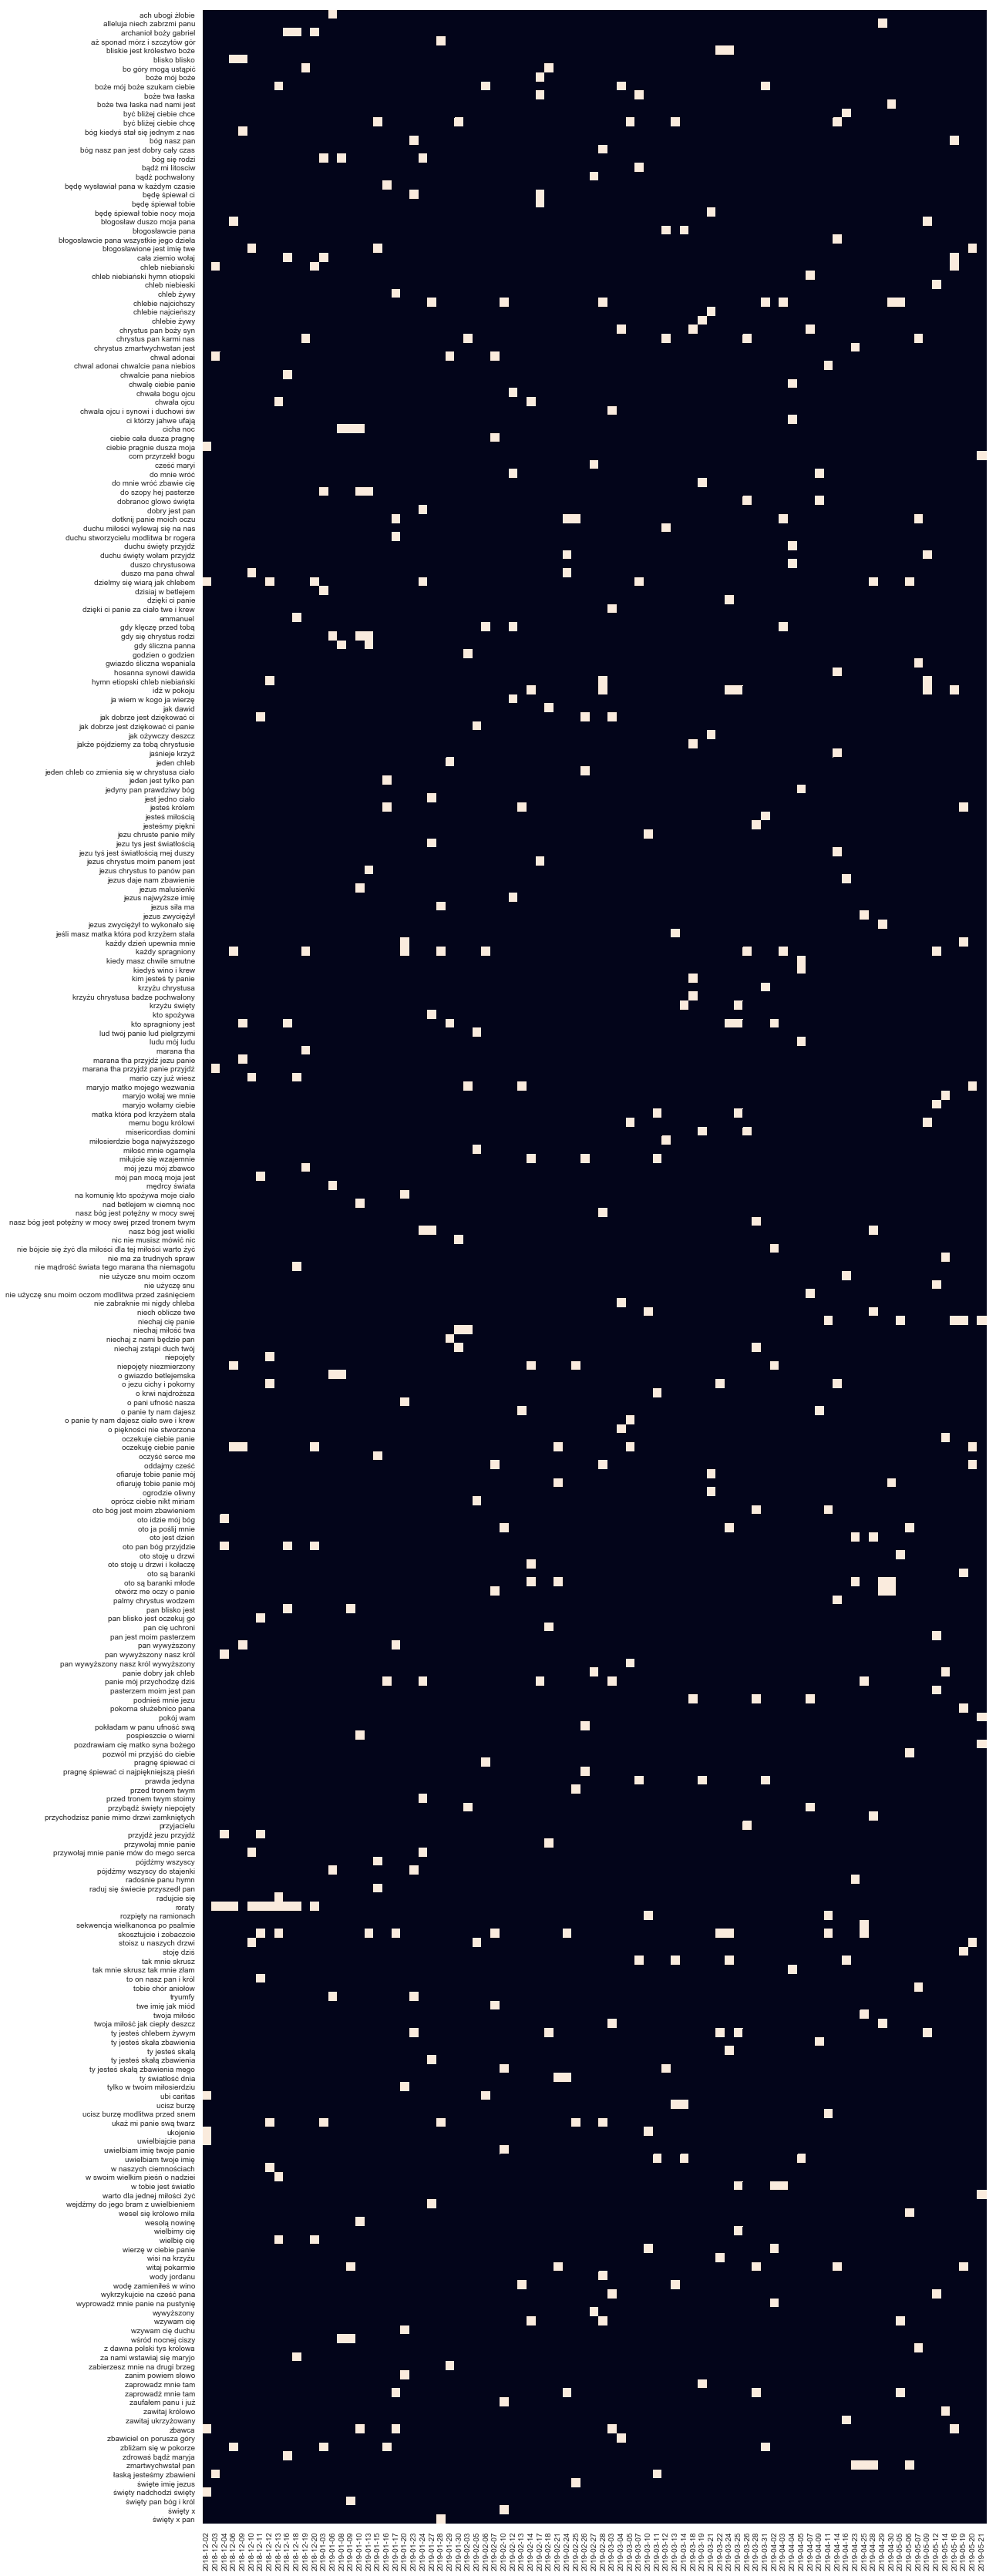

In [18]:
plt.figure(figsize=(80,60))
sns.set(font_scale=0.9)
sns.heatmap(test.values, cbar=False, annot=False, 
            xticklabels= test.columns, 
            yticklabels = test.index, 
            square=True,
          # linewidths=.01
           )
plt.xticks(rotation=90) 
plt.show()

In [19]:
print(df_sim['2018-12-02'].nlargest(7))
print()
print(test['2018-12-02'].nlargest(7))

oto jest dzień             0.118585
schowaj mnie               0.098058
jesteś życiem mym          0.083333
tak mnie skrusz            0.079057
wszelka chwała             0.073721
nasz bóg jest wielki       0.070711
ty tylko mnie poprowadź    0.064550
Name: 2018-12-02, dtype: float64

ciebie pragnie dusza moja        1
dzielmy się wiarą jak chlebem    1
ubi caritas                      1
ukojenie                         1
uwielbiajcie pana                1
zbawca                           1
święty nadchodzi święty          1
Name: 2018-12-02, dtype: int64


In [20]:
test['2018-12-02'].sum()

7

In [21]:
k=[]
for date in czytania.index:
    k.append(test[date].sum())
    
print(k)
print(np.sum(k))

[7, 5, 5, 7, 6, 6, 7, 7, 7, 8, 6, 5, 7, 6, 6, 5, 5, 8, 5, 5, 5, 7, 7, 5, 7, 7, 5, 5, 4, 5, 5, 5, 6, 6, 5, 4, 7, 6, 5, 5, 6, 5, 5, 4, 9, 7, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 8, 7, 5, 7, 6, 6, 5, 5, 5, 5, 4, 6, 8, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 7, 5, 6, 7, 5, 5]
494


In [22]:
x = []
for i, date in enumerate(czytania.index):
    model_recommendation = df_sim[date].nlargest(k[i])
    human_recommendation = test[date].nlargest(k[i])
    counter = 0
    for each in model_recommendation.index:
        if each in human_recommendation.index:
            counter += 1
    x.append(counter)
print(x)
print("Suma wszystkich dopasowanych poprawnie:", 
          np.sum(x))
print("Średnia liczba poprawnych dopasowań na liczbę czytań",
          np.round(np.sum(x) / len(czytania), 3))
print("Średnia liczba poprawnych dopasowań na liczbę rekomendowanych piosenek",
          np.round(np.sum(x) / np.sum(k),3))

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]
Suma wszystkich dopasowanych poprawnie: 15
Średnia liczba poprawnych dopasowań na liczbę czytań 0.172
Średnia liczba poprawnych dopasowań na liczbę rekomendowanych piosenek 0.03
